In [ ]:
    A) Data Analysis:
        a. Import the dataset
        b. Get information about dataset (mean, max, min, quartiles etc.)
        c. Find the correlation between all fields.

In [3]:
import pydotplus
import graphviz

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report



In [5]:
data = pd.read_csv("dataset.csv")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
for i in data.columns:
    print(i,len(data[i].unique()))

('age', 41)
('sex', 2)
('cp', 4)
('trestbps', 49)
('chol', 152)
('fbs', 2)
('restecg', 3)
('thalach', 91)
('exang', 2)
('oldpeak', 40)
('slope', 3)
('ca', 5)
('thal', 4)
('target', 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


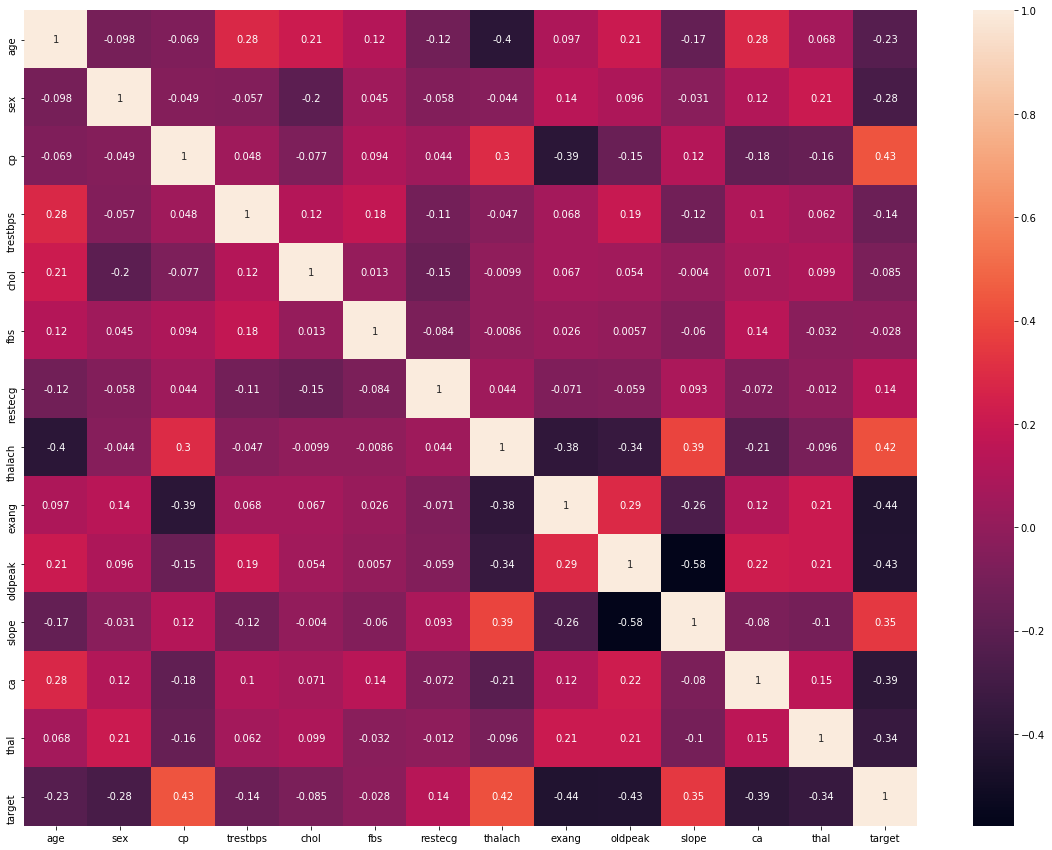

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)


In [ ]:

    B) Data Visualization:
        a. Visualize the number of patients having a heart disease and not having a heart disease.
        b. Visualize the age and weather patient has disease or not
        c. Visualize correlation between all features using a heat map

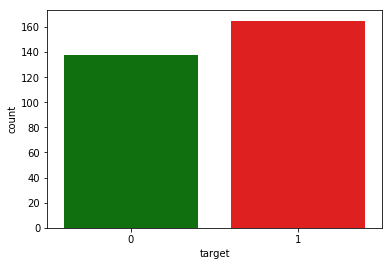

In [11]:
sns.countplot(x = "target",data = data,palette=["green","red"])

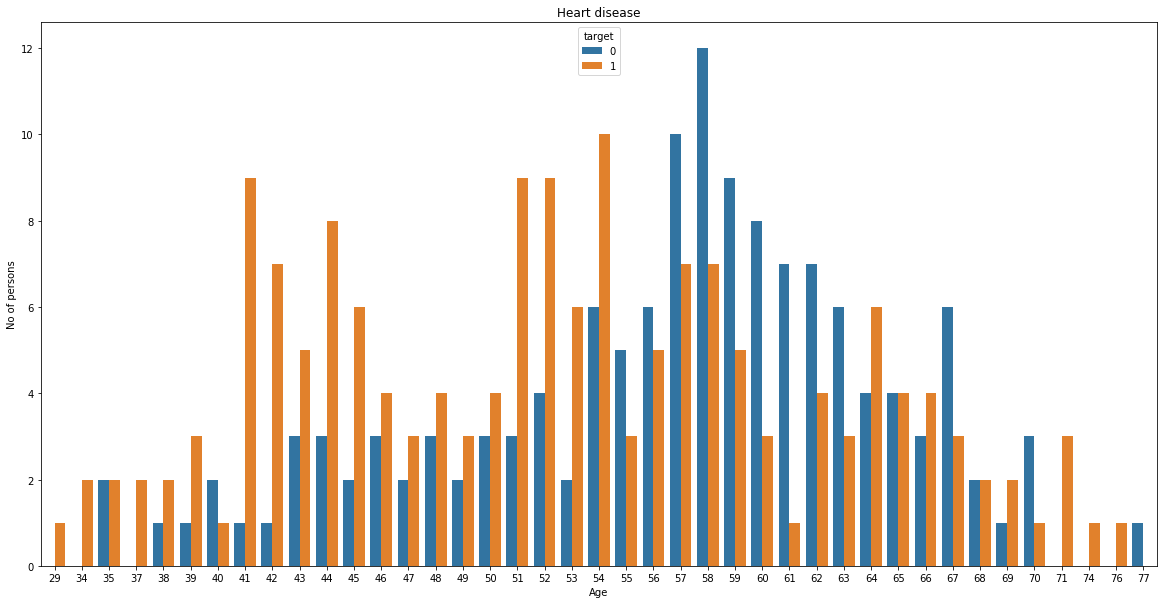

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x = "age",hue="target",data = data)
plt.title("Heart disease")
plt.xlabel("Age")
plt.ylabel("No of persons")
plt.show()

In [ ]:
    C) Logistic Regression:
        a. Build a simple logistic regression model 
            i. Divide the dataset in 70:30 ratio
            ii. Build the model on train set and predict the values on test set
            iii. Build the confusion matrix and get the accu	racy score

In [13]:
lr = LogisticRegression(C = 100)

In [14]:
lr

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y = data.target.values

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
X = data.drop("target",axis = 1)

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
X = X.values

In [20]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0,test_size = 0.3)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [23]:
lr.fit(X_train,y_train)

/home/shivasai7392/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
lr.score(X_train,y_train)

0.8679245283018868

In [25]:
lr.score(X_test,y_test)

0.8131868131868132

In [26]:
accuracy_score(y_test,lr.predict(X_test))

0.8131868131868132

In [27]:
confusion_matrix(y_test,lr.predict(X_test))

array([[32, 12],
       [ 5, 42]])

In [ ]:
    D) Decision Tree:
        a. Build a decision tree model
            i. Divide the dataset in 70:30 ratio
            ii. Build the model on train set and predict the values on test set
            iii. Build the confusion matrix and calculate the accuracy
            iv. Visualize the decision tree using the graphviz package

In [28]:
dt = DecisionTreeClassifier(max_depth = 3)

In [29]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
dt.score(X_train,y_train)

0.8679245283018868

In [31]:
dt.score(X_test,y_test)

0.8131868131868132

In [32]:
accuracy_score(y_test,dt.predict(X_test))

0.8131868131868132

In [33]:
confusion_matrix(y_test,dt.predict(X_test))

array([[32, 12],
       [ 5, 42]])

In [34]:
from sklearn import tree

In [35]:
tree.export_graphviz(dt,out_file="dt_tree.dot",feature_names=data.drop("target",axis=1).columns,class_names=["Female","male"],filled = True)

In [36]:
f = open("dt_tree.dot")

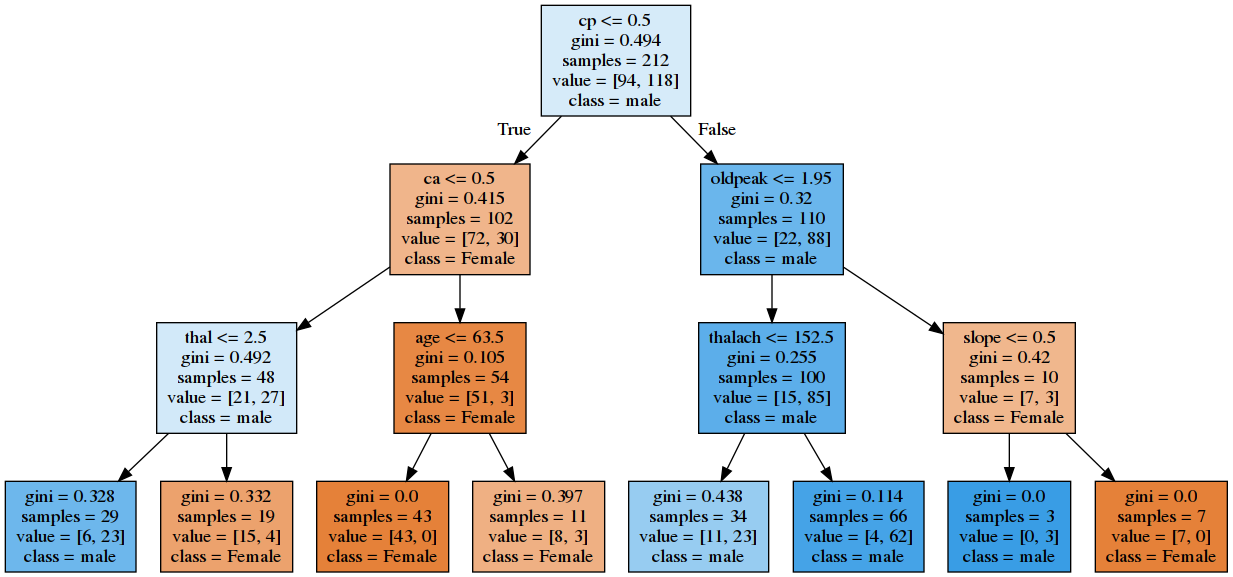

In [37]:
graph = pydotplus.graph_from_dot_data(f.read())
Image(graph.create_png())

In [ ]:
    E) Random Forest:
        a. Build a Random Forest model 
            i. Divide the dataset in 70:30 ratio
            ii. Build the model on train set and predict the values on test set
            iii. Build the confusion matrix and calculate the accuracy
            iv. Visualize the model using the graphviz package

In [38]:
rf = RandomForestClassifier(max_depth=4)

In [39]:
rf.fit(X_train,y_train)

/home/shivasai7392/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rf.score(X_train,y_train)

0.9150943396226415

In [41]:
rf.score(X_test,y_test)

0.8461538461538461

In [42]:
accuracy_score(y_test,rf.predict(X_test))

0.8461538461538461

In [43]:
confusion_matrix(y_test,rf.predict(X_test))

array([[33, 11],
       [ 3, 44]])

In [44]:
len(rf.estimators_)

10

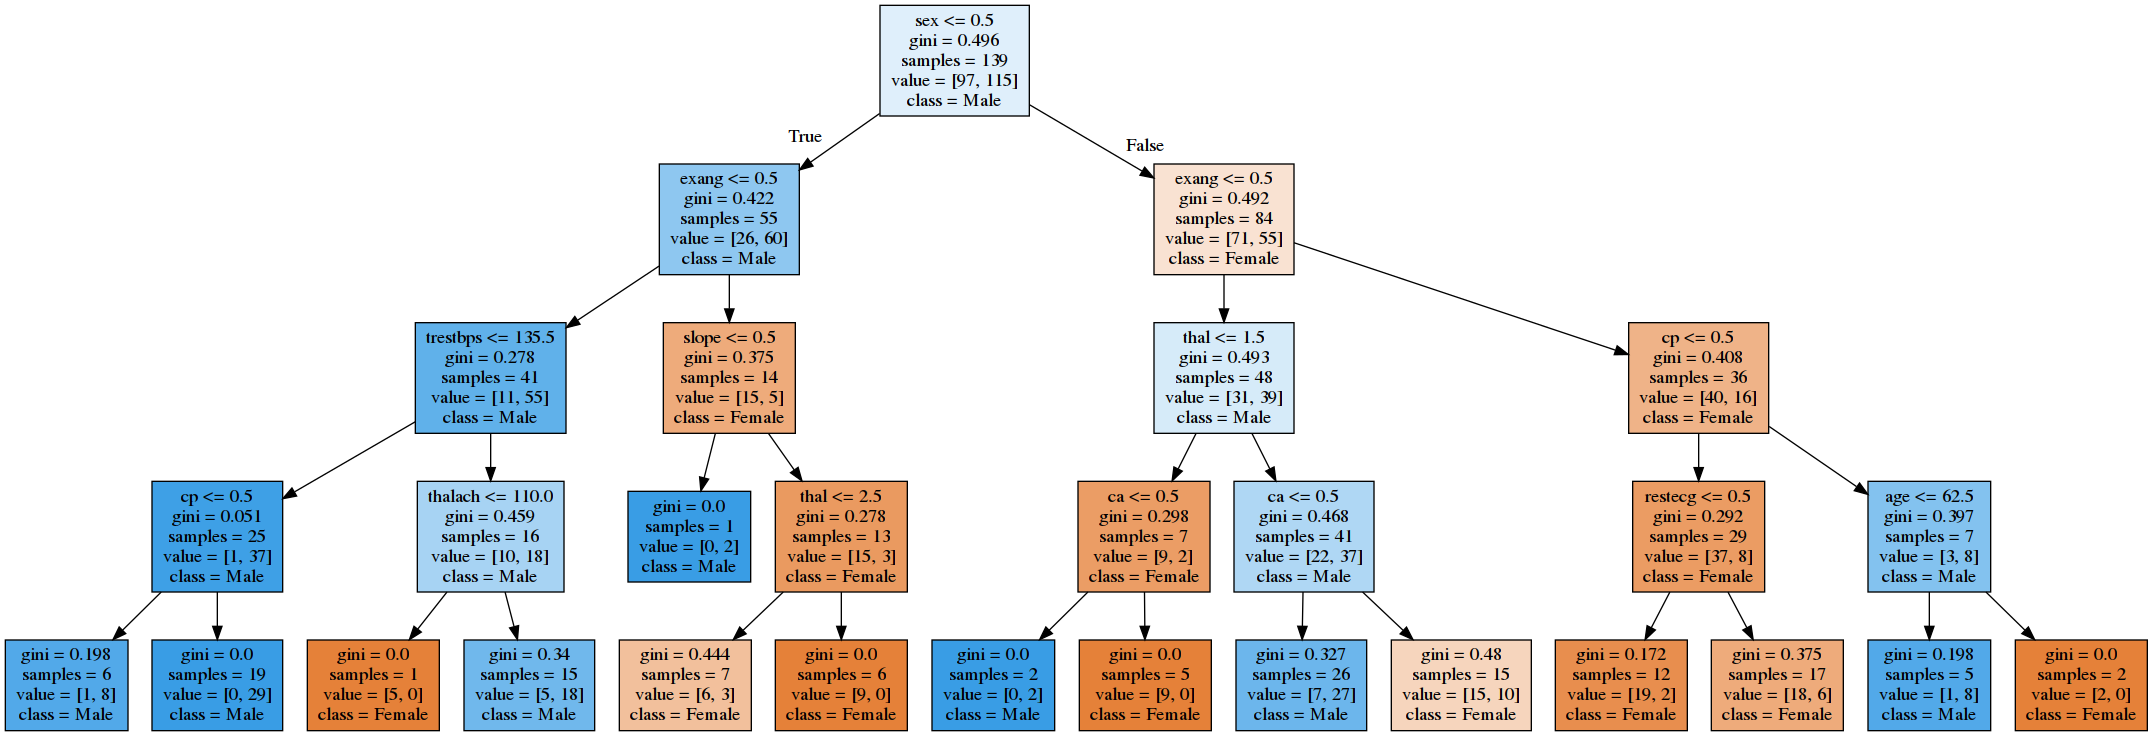

In [45]:

dot_file = tree.export_graphviz(rf.estimators_[0],feature_names=data.drop("target",axis = 1).columns,class_names=["Female","Male"],filled=True)
graph = pydotplus.graph_from_dot_data(dot_file)
Image(graph.create_png())

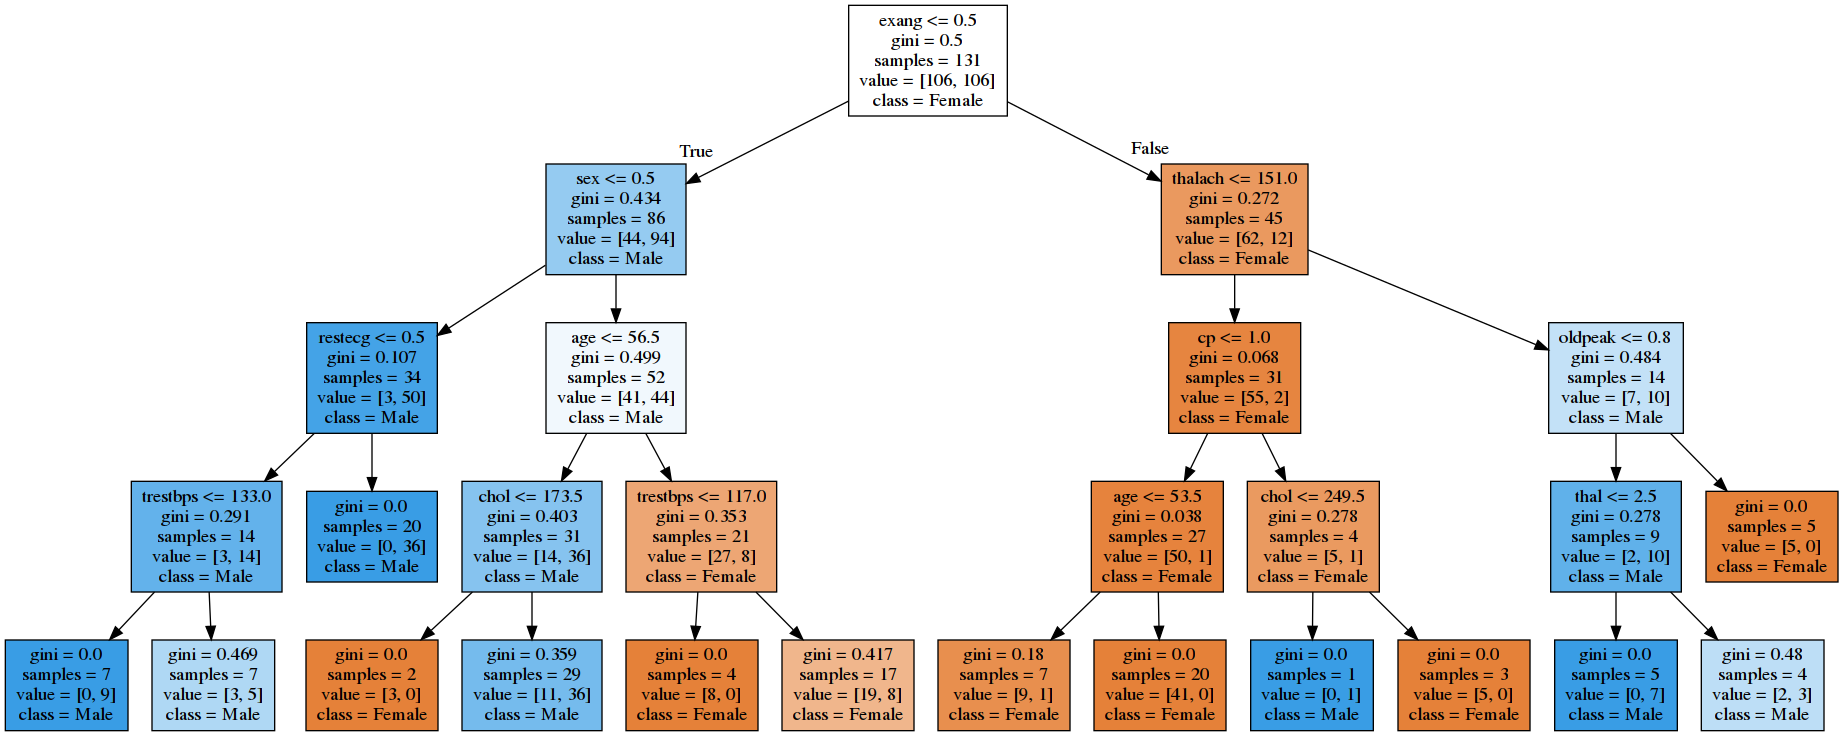

In [46]:

dot_file = tree.export_graphviz(rf.estimators_[9],feature_names=data.drop("target",axis = 1).columns,class_names=["Female","Male"],filled=True)
graph = pydotplus.graph_from_dot_data(dot_file)
Image(graph.create_png())

In [ ]:
    F) Select the best model
        a. Print the confusion matrix of all classifiers
        b. Print the classification report of all classifiers
        c. Calculate Recall Precision and F1 score of all the models
        d. Visualize confusion matrix using heatmaps and Recall Precision and F1 score of all the models using bar graphs
        e. Select the best model based on the best ac

In [47]:
for i in [lr,dt,rf]:
    print(str(i).split("(")[0])
    print(confusion_matrix(y_test,i.predict(X_test)))
    print("")

LogisticRegression
[[32 12]
 [ 5 42]]

DecisionTreeClassifier
[[32 12]
 [ 5 42]]

RandomForestClassifier
[[33 11]
 [ 3 44]]



In [180]:
for i in [lr,dt,rf]:
    print(str(i).split("(")[0])
    print(classification_report(y_test,i.predict(X_test)))
    print("")

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.85      0.87      0.86        47

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.86      0.86        91
weighte

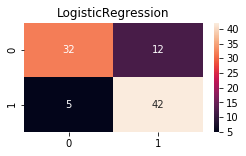

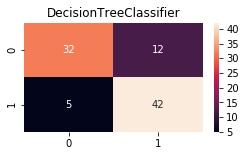

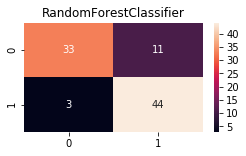

In [48]:
for i in [lr,dt,rf]:
    plt.figure(figsize=(4,2))
    plt.title(str(i).split("(")[0])
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True)